# Influence of riders in bicycle accidents in Madrid
---

## Capstone Project for the IBM Data Science Professional Certificate
#### Author: Isidro Brevers Gómez (ibrevers@gmail.com)

Full coding (with map and chart outputs): <a href='https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/7c568a76-b712-42fd-808b-d5c80aefd17b/view?access_token=64b76f803b0b2432eb05da02153caaad67bac6194b809eb140f729ac1654c81b'>Influence of riders in bicycle accidents in Madrid.</a>

Report: (Github link)

Blogpost: (Linkedin link)

---

## Introduction and Purpose
In recent years, there has been an increasing demand of food delivery services in Madrid which has led to a significant number of bicycle riders in the city.

The purpose of this project is to analyze whether the number of bicycle riders has any influence in regard to the number of bicycle accidents in Madrid.

## Data description and source
- Bicycle accidents in Madrid in 2019: Traffic accidents in Madrid in 2019 data, available in the Madrid's council opendata website (https://datos.madrid.es/portal/site/egob/).
- Coordinates for Madrid districts: GeoDatos website (https://www.geodatos.net/).
- Madrid venues: Foursquare Developers API (https://developer.foursquare.com/).

## Methodology
- Bicycle accidents per district in Madrid in 2019 data is obtained from the traffic accidents in Madrid in 2019 data available in the Madrid's council opendata website, processed and grouped by district.
- Information regarding the number of venues per district is obtained from Foursquare through the Developers API.
- Correlation between both variables is statistically analyzed.
- Regression model is developed and evaluated.

A more detailed description of the Methodology is included in the Report and Blogpost.

<a id='ToC'></a>
## Table of contents

<a href='#1'>1. Bicycle accidents in Madrid in 2019 by district.</a>
- <a href='https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/bbdbe2a5-ce58-4455-8b42-0ca4a69bf7f3/view?access_token=43d39906553f576ad4f43a3f6b3ce32b30a1267daa40ffaad31e048e3f9f3bfb'>Aux 1 Bicycle accidents in Madrid 2019 by district.</a>
    
    
<a href='#2'>2. Geolocating Madrid districts.</a>

<a href='#3'>3. Geolocating bicycle accidents in Madrid in 2019 by district.</a>

<a href='#4'>4. Geolocating Madrid Venues (Foursquare API).</a>
- <a href='https://dataplatform.cloud.ibm.com/analytics/notebooks/v2/9affbcb9-6fbc-4b06-a9ad-93c9bdf1fb4d/view?access_token=dff773c2d19fd690e688b760042a17585dcc381b0e98e120983e498ee93b775e'>Aux 4 Madrid venues - Foursquare API.</a>
    
    
<a href='#5'>5. Correlation between the number of bicycle accidents and the number of venues per district.</a>

<a href='#6'>6. Model development and evaluation.</a>

## 0. Install and import libraries

In [1]:
# IBM cloud
import types
from botocore.client import Config
import ibm_boto3

import pandas as pd # Data analysis
import numpy as np # Scientific computing

# Visualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Map visualization
!pip install folium
import folium
from folium import plugins
from folium.plugins import MarkerCluster

from geopy.geocoders import Nominatim # Geocoding

import seaborn as sns # Statistical data visualization

from scipy import stats # Statistics

# Machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

     |████████████████████████████████| 92kB 5.8MB/s eta 0:00:011


<a id='1'></a>
## 1. Bicycle accidents in Madrid in 2019 by district

#### Create a DataFrame (df_accidents_summary) from the 'Bicycle_Accidents.csv' file created in notebook '1 Aux Bicycle accidents in Madrid 2019 by district' .
#### Cell is hidden as it contains credentials.

In [2]:
# The code was removed by Watson Studio for sharing.

#### Bicycle accidents in Madrid in 2019 group by district

In [3]:
df_accidents_summary

,DISTRICT,NO ACCIDENTS
0,CENTRO,142
1,ARGANZUELA,72
2,SALAMANCA,72
3,CHAMBERI,70
4,RETIRO,59
5,FUENCARRAL-EL PARDO,49
6,TETUAN,45
7,MONCLOA-ARAVACA,45
8,CARABANCHEL,43
9,PUENTE DE VALLECAS,36


#### Chart 1: Bar chart Number of bicycle accidents in Madrid in 2019 by district

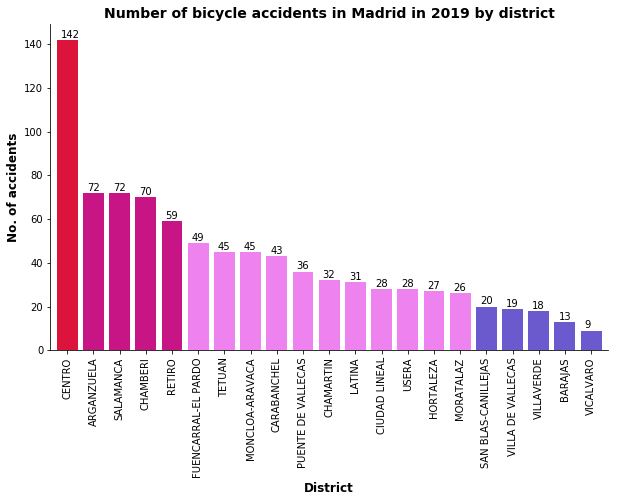

In [4]:
df_barchart = df_accidents_summary.set_index(['DISTRICT'])

# Color array for the heat
c = [('crimson', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'mediumvioletred', 'violet', 'violet', 'violet', 'violet', 'violet', 'violet', 'violet', 'violet',
      'violet', 'violet', 'violet', 'slateblue', 'slateblue', 'slateblue', 'slateblue', 'slateblue')]

# Add markers to bar chart
ax = df_barchart.plot(kind='bar', figsize=(10, 6), width=0.8, color=c)

xs = df_accidents_summary['DISTRICT']
ys = df_accidents_summary['NO ACCIDENTS']

plt.xlabel('District', fontweight='bold', fontsize=12)
plt.ylabel('No. of accidents', fontweight='bold', fontsize=12)
plt.title('Number of bicycle accidents in Madrid in 2019 by district', fontweight='bold', fontsize=14)

ax.set_facecolor('none')
ax.legend().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for index,data in enumerate(ys):
    plt.text(x=index-0.25 , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))

# Display chart
plt.show()

<a href='#ToC'>[Back to Table of Contents]</a>

<a id='2'></a>
## 2. Geolocating Madrid districts

#### Create a DataFrame (df_madrid_geo) including the coordinates for each Madrid district.
#### Cell is hidden as it contains credentials.

In [5]:
# The code was removed by Watson Studio for sharing.

#### Coordinates for Madrid districts

In [6]:
df_madrid_geo.head()

,DISTRICT,LATITUDE,LONGITUDE
0,ARGANZUELA,40.400211,-3.696180
1,BARAJAS,40.473659,-3.577770
2,CARABANCHEL,40.375215,-3.744876
3,CENTRO,40.411516,-3.707644
4,CHAMARTIN,40.462059,-3.676600


In [7]:
# Obtain the coordinates for Madrid
address = 'Madrid'
geolocator = Nominatim(user_agent="madrid_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

#### Map 1: Madrid districts

In [8]:
map_madrid1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add markers to map
for lat, lng, district in zip(df_madrid_geo['LATITUDE'], df_madrid_geo['LONGITUDE'], df_madrid_geo['DISTRICT']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(map_madrid1)

# Display map
map_madrid1

<a href='#ToC'>[Back to Table of Contents]</a>

<a id='3'></a>
## 3. Geolocating bicycle accidents in Madrid in 2019 by district

#### Merge DataFrames 'df_accidents_summary' and 'df_madrid_geo' into new df 'df_accidents_geo' by 'DISTRICT'

In [9]:
# Merge both tables
df_accidents_geo = pd.merge(df_accidents_summary, df_madrid_geo, on='DISTRICT')

#### Number of accidents in 2019 and coordinates for each Madrid district

In [10]:
df_accidents_geo

,DISTRICT,NO ACCIDENTS,LATITUDE,LONGITUDE
0,CENTRO,142,40.411516,-3.707644
1,ARGANZUELA,72,40.400211,-3.696180
2,SALAMANCA,72,40.429722,-3.679750
3,CHAMBERI,70,40.434040,-3.703790
4,RETIRO,59,40.413170,-3.683070
5,FUENCARRAL-EL PARDO,49,40.498402,-3.731400
6,TETUAN,45,40.459751,-3.697500
7,MONCLOA-ARAVACA,45,40.435471,-3.731700
8,CARABANCHEL,43,40.375215,-3.744876
9,PUENTE DE VALLECAS,36,40.393539,-3.662000


#### Map 2: Bicycle accidents in Madrid in 2019 by districts

In [11]:
# Bubble heat map

# New df clustering the districts into bins on the no of accidents
bins = [0, 25, 50, 125]
cluster = np.searchsorted(bins, df_accidents_geo['NO ACCIDENTS'].values)
df_accidents_geo['CLUSTER'] = cluster

# New df for each bin
df_cluster1 = df_accidents_geo[df_accidents_geo['CLUSTER']==1].reset_index()
df_cluster2 = df_accidents_geo[df_accidents_geo['CLUSTER']==2].reset_index()
df_cluster3 = df_accidents_geo[df_accidents_geo['CLUSTER']==3].reset_index()
df_cluster4 = df_accidents_geo[df_accidents_geo['CLUSTER']==4].reset_index()

# New empty map
map_madrid2 = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add markers
for i in range(0,len(df_cluster1)):
   folium.Circle(
      location=[df_cluster1.iloc[i]['LATITUDE'], df_cluster1.iloc[i]['LONGITUDE']],
      popup='{} \n {}'.format(df_cluster1.iloc[i]['DISTRICT'], df_cluster1.iloc[i]['NO ACCIDENTS']),
      radius=float(df_cluster1.iloc[i]['NO ACCIDENTS'])*7,
      color='slateblue',
      fill=True,
      fill_color='slateblue',
      fill_opacity=0.9,
   ).add_to(map_madrid2)
for i in range(0,len(df_cluster2)):
   folium.Circle(
      location=[df_cluster2.iloc[i]['LATITUDE'], df_cluster2.iloc[i]['LONGITUDE']],
      popup='{} \n {}'.format(df_cluster2.iloc[i]['DISTRICT'], df_cluster2.iloc[i]['NO ACCIDENTS']),
      radius=float(df_cluster2.iloc[i]['NO ACCIDENTS'])*7,
      color='violet',
      fill=True,
      fill_color='violet',
      fill_opacity=0.9,
   ).add_to(map_madrid2)
for i in range(0,len(df_cluster3)):
   folium.Circle(
      location=[df_cluster3.iloc[i]['LATITUDE'], df_cluster3.iloc[i]['LONGITUDE']],
      popup='{} \n {}'.format(df_cluster3.iloc[i]['DISTRICT'], df_cluster3.iloc[i]['NO ACCIDENTS']),
      radius=float(df_cluster3.iloc[i]['NO ACCIDENTS'])*7,
      color='mediumvioletred',
      fill=True,
      fill_color='mediumvioletred',
      fill_opacity=0.9,
   ).add_to(map_madrid2)
for i in range(0,len(df_cluster4)):
   folium.Circle(
      location=[df_cluster4.iloc[i]['LATITUDE'], df_cluster4.iloc[i]['LONGITUDE']],
      popup='{} \n {}'.format(df_cluster4.iloc[i]['DISTRICT'], df_cluster4.iloc[i]['NO ACCIDENTS']),
      radius=float(df_cluster4.iloc[i]['NO ACCIDENTS'])*7,
      color='crimson',
      fill=True,
      fill_color='crimson',
      fill_opacity=0.9,
   ).add_to(map_madrid2)
 
map_madrid2

<a href='#ToC'>[Back to Table of Contents]</a>

<a id='4'></a>
## 4. Geolocating Madrid Venues (Foursquare API)

#### Create a DataFrame (df_venues) from the 'Venues.csv' file created in notebook '4 Aux Madrid Venues (Foursquare API)' .
#### Cell is hidden as it contains credentials.

In [12]:
# The code was removed by Watson Studio for sharing.

#### Madrid Venues

In [13]:
df_venues.head(10)

,DISTRICT,LATITUDE,LONGITUDE,VENUE,VENUE LATITUDE,VENUE LONGITUDE,VENUE CATEGORY
0,ARGANZUELA,40.400211,-3.69618,La PequeÃ±a GranÃ¡,40.399574,-3.698550,Tapas Restaurant
1,ARGANZUELA,40.400211,-3.69618,Havana Blues,40.402050,-3.698488,Cuban Restaurant
2,ARGANZUELA,40.400211,-3.69618,El Quinto Pecado,40.400028,-3.694446,Gastropub
3,ARGANZUELA,40.400211,-3.69618,Tres Cerditos,40.397316,-3.694184,Chinese Restaurant
4,ARGANZUELA,40.400211,-3.69618,Restaurante Buen Gusto,40.401766,-3.698961,Chinese Restaurant
5,ARGANZUELA,40.400211,-3.69618,PanArte,40.399279,-3.694182,Bakery
6,ARGANZUELA,40.400211,-3.69618,El Puchero de mi Abuela,40.403074,-3.695951,Restaurant
7,ARGANZUELA,40.400211,-3.69618,Las tinajas,40.396993,-3.697779,Tapas Restaurant
8,ARGANZUELA,40.400211,-3.69618,Casa Maxi,40.398272,-3.697815,Restaurant
9,ARGANZUELA,40.400211,-3.69618,Restaurante Alconada,40.399728,-3.700141,Spanish Restaurant


#### Map 3: Madrid venues

In [14]:
map_madrid3 = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add markers to map
for lat, lng, venue in zip(df_venues['VENUE LATITUDE'], df_venues['VENUE LONGITUDE'], df_venues['VENUE']):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.Circle(
        location=[lat, lng],
        radius='60',
        color='slaterblue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.8,
        popup=label,
    ).add_to(map_madrid3)

# Display map
map_madrid3

<a href='#ToC'>[Back to Table of Contents]</a>

<a id='5'></a>
## 5. Correlation between the number of bicycle accidents and the number of venues per district

#### Create a DataFrame (df_venues_summary) from the 'Venues_Summary.csv' file created in notebook '4 Aux Madrid Venues (Foursquare API)' .
#### Cell is hidden as it contains credentials.

In [15]:
# The code was removed by Watson Studio for sharing.

#### Number of venues in Madrid by district

In [16]:
df_venues_summary

,DISTRICT,NO VENUES
0,CENTRO,100
1,CHAMBERI,85
2,SALAMANCA,34
3,ARGANZUELA,31
4,CIUDAD LINEAL,24
5,TETUAN,24
6,BARAJAS,20
7,PUENTE DE VALLECAS,18
8,SAN BLAS-CANILLEJAS,16
9,HORTALEZA,9


#### Merge DataFrames 'df_accidents_summary' and 'df_venues_summary' into new df 'df_influence' by 'DISTRICT'

In [17]:
# Merge both tables
df_influence = pd.merge(df_accidents_summary, df_venues_summary, on='DISTRICT')

#### Number of bicycle accidents in 2019 and venues in Madrid by district

In [18]:
df_influence

,DISTRICT,NO ACCIDENTS,NO VENUES
0,CENTRO,142,100
1,ARGANZUELA,72,31
2,SALAMANCA,72,34
3,CHAMBERI,70,85
4,RETIRO,59,5
5,FUENCARRAL-EL PARDO,49,0
6,TETUAN,45,24
7,MONCLOA-ARAVACA,45,2
8,CARABANCHEL,43,4
9,PUENTE DE VALLECAS,36,18


#### Basic statistical details of the information in the DataFrame

In [19]:
df_influence.describe()

,NO ACCIDENTS,NO VENUES
count,21.000000,21.000000
mean,42.095238,19.523810
std,29.656205,26.312771
min,9.000000,0.000000
25%,26.000000,5.000000
50%,32.000000,8.000000
75%,49.000000,24.000000
max,142.000000,100.000000


#### Correlation between bicycle accidents and number of venues

In [20]:
df_influence[['NO ACCIDENTS', 'NO VENUES']].corr()

,NO ACCIDENTS,NO VENUES
NO ACCIDENTS,1.000000,0.791514
NO VENUES,0.791514,1.000000


#### Chart 2: Scatterplot Regression between bicycle accidents and number of venues by district

(0, 156.10100760542724)

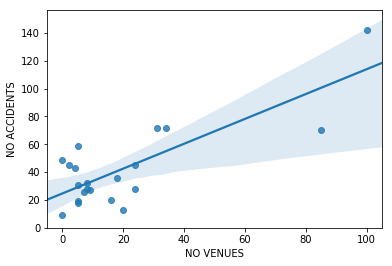

In [21]:
sns.regplot(x='NO VENUES', y='NO ACCIDENTS', data=df_influence)
plt.ylim(0,)

A positive linear relationship is observed between the number of bicycle accidents in Madrid in 2019 and the number of venues per district.

#### Pearson Correlation Coefficient and P-value

In [22]:
pearson_coef, p_value = stats.pearsonr(df_influence['NO VENUES'], df_influence['NO ACCIDENTS'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7915140331955097  with a P-value of P = 1.9212793826658736e-05


There is a quite strong positive linear relationship between the number of bicycle accidents in Madrid in 2019 and the number of venues per district (as the number of venues increase, so it does the number of bicycle accidents).

Since the P-value is lower than 0.0001, the correlation between the number of bicycle accidents in Madrid in 2019 and the number of venues per district is statistically significant.

<a href='#ToC'>[Back to Table of Contents]</a>

<a id='6'></a>
## 6. Model development and evaluation

### 6.1 Model development

In [23]:
# Create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Predict the number of accidents based on the number of venues

In [24]:
x = df_influence[['NO VENUES']] # Predictor variable
y = df_influence['NO ACCIDENTS'] # Response variable

lm.fit(x,y) # Fit the linear model

Yhat=lm.predict(x) # Output a prediction

print('Intercept (a): ', lm.intercept_)
print('Slope (b): ', lm.coef_)

print('No accidents = ', lm.intercept_, ' + ', lm.coef_, ' x No venues')

Intercept (a):  24.67828550991774
Slope (b):  [0.89208782]
No accidents =  24.67828550991774  +  [0.89208782]  x No venues


Linear function (𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋Yhat=a+bX): No. accidents = 24.6783 + 0.8921 * No. venues

#### Chart 3: Plot linear function

(0, 118.3475061212138)

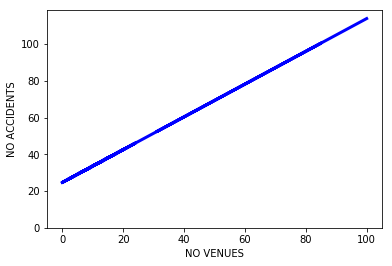

In [25]:
plt.plot(x, Yhat, color='blue', linewidth=3)
plt.xlabel('NO VENUES', fontsize=10)
plt.ylabel('NO ACCIDENTS', fontsize=10)
plt.ylim(0,)

### 6.2 Model evaluation

#### Chart 4: Residual plot

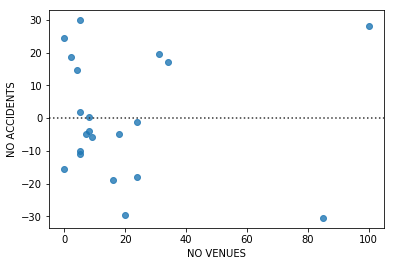

In [26]:
sns.residplot(x='NO VENUES', y='NO ACCIDENTS', data=df_influence)

Although most of the residuals are concentrated in the left half of the x-axis, in general residuals are randomly spread around the x-axis, which leads us to believe that a linear model is appropriate considering the size of the data.

#### R-squared

In [27]:
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.6264944647454227


62.65% of the variation of the number of bicycle accidents in Madrid per district in 2019 is explained by the number of venues per district.

<a href='#ToC'>[Back to Table of Contents]</a>